<a href="https://colab.research.google.com/github/shaking54/compression/blob/master/Image_Compression_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import random
import cv2 
import numpy as np
from numpy import matlib

In [113]:
class K_Means_compression(object):
    def __init__(self):
      self.rows = None
      self.cols = None
      self.X = None
      self.c = None
      self.K = 16
      self.idx = None
      self.centroids = None
      pass
    
    def load_image(self, path):
        image = cv2.imread(path)
        self.rows = image.shape[0]
        self.cols = image.shape[1]
        self.image = image/255
        self.X = image.reshape(image.shape[0]*image.shape[1],3)

    def init_centroids(self):
        self.c = random.sample(list(self.X),self.K)
        
    def run_kMean(self):
        m = np.size(self.X,0)
        n = np.size(self.X,1)
        K = np.size(self.c,0)
        temp_centroids = self.c
        previous_centroids = temp_centroids
        temp_idx = np.zeros((m,1))
        for i in range(1,self.K):
            temp_idx = self.closest_centroids(self.X,temp_centroids)
            temp_centroids = self.compute_centroids(self.X,temp_idx, K)
        self.centroids = temp_centroids
        self.idx = temp_idx


    @staticmethod
    def closest_centroids(X,c):
        K = np.size(c,0)
        idx = np.zeros((np.size(X,0),1))
        arr = np.empty((np.size(X,0),1))
        for i in range(0,K):
            y = c[i] 
            temp = np.ones((np.size(X,0),1))*y
            b = np.power(np.subtract(X,temp),2) # b = (X-temp)^2
            a = np.sum(b,axis = 1)
            a = np.asarray(a)
            a.resize((np.size(X,0),1))
            #print(np.shape(a))
            arr = np.append(arr, a, axis=1)
        arr = np.delete(arr,0,axis=1)
        idx = np.argmin(arr, axis=1)
        return idx

    @staticmethod
    def compute_centroids(X,idx,K):
        n = np.size(X,1)
        centroids = np.zeros((K,n))
        for i in range(0,K):
            ci = idx==i
            ci = ci.astype(int)
            total_number = sum(ci);
            ci.resize((np.size(X,0),1))
            total_matrix = np.matlib.repmat(ci,1,n)
            ci = np.transpose(ci)
            total = np.multiply(X,total_matrix)
            centroids[i] = (1/total_number)*np.sum(total,axis=0)
        return centroids

In [114]:
kmeans = K_Means_compression()


In [139]:
def compression(path, kmeans):
    for filename in os.listdir(path): 
      if filename.endswith('.jpg') or filename.endswith('.JPG') or filename.endswith('.png'):
          kmeans.load_image(path+ '/'+ filename)
          kmeans.init_centroids()
          kmeans.run_kMean()
          #idx.resize((np.size(X,0),1))
          print(np.shape(kmeans.centroids))
          print(np.shape(kmeans.idx))
          idx = kmeans.closest_centroids(kmeans.X,kmeans.centroids)
          X_recovered = kmeans.centroids[idx]
          print(np.shape(X_recovered))
          X_recovered = np.reshape(X_recovered, (kmeans.rows, kmeans.cols, 3))
          print(np.shape(X_recovered))
          cv2.imwrite('small_'+ filename, X_recovered)
          import matplotlib.pyplot as plt
          img = cv2.imread('small_'+filename)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          plt.imshow(img)

(16, 3)
(12192768,)
(12192768, 3)
(4032, 3024, 3)


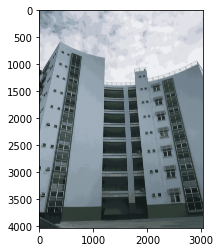

In [142]:
compression('/content/', kmeans)

In [143]:
import os
info = os.stat('/content/IMG_3573.JPG')
print("size of image before running K-mean algorithm: ",info.st_size/1024,"KB")
info = os.stat('/content/small_IMG_3573.JPG')
print("size of image after running K-mean algorithm: ",info.st_size/1024,"KB")

size of image before running K-mean algorithm:  1968.212890625 KB
size of image after running K-mean algorithm:  2671.90234375 KB
